In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
data = pd.concat([exercise, calories.Calories], axis=1)

In [8]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
data.shape

(15000, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Gender = encoder.fit_transform(data.Gender)

In [12]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: xlabel='Gender', ylabel='Count'>

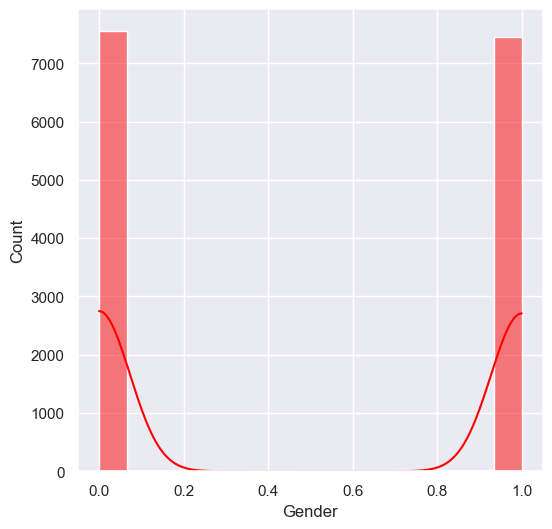

In [14]:
sns.set()
plt.figure(figsize=(6, 6))
sns.histplot(data.Gender, kde=True, color='red')

In [15]:
data.Gender.value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

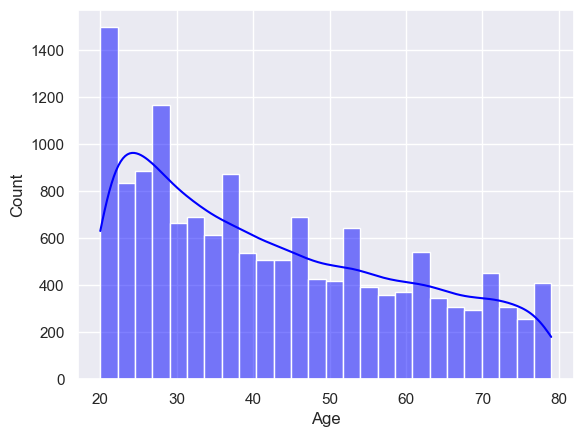

In [16]:
sns.histplot(data.Age, kde=True, color='blue')

<Axes: xlabel='Height', ylabel='Count'>

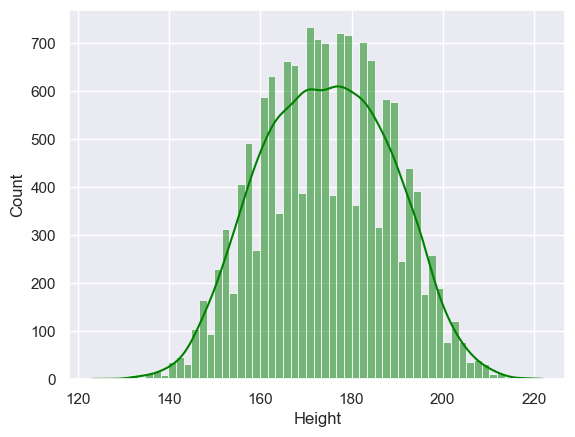

In [17]:
sns.histplot(data.Height, kde=True, color='green')

<Axes: xlabel='Weight', ylabel='Count'>

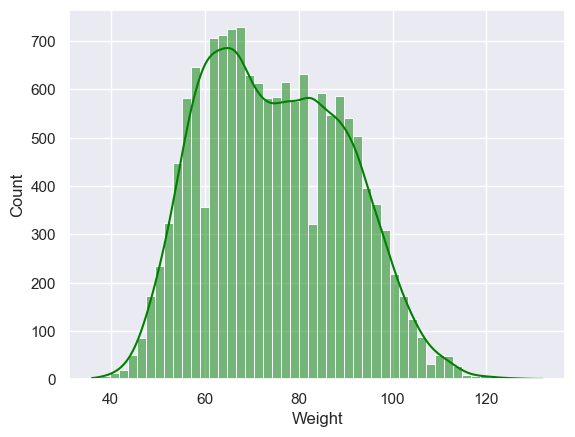

In [18]:
sns.histplot(data.Weight, kde=True, color='green')

<Axes: xlabel='Duration', ylabel='Count'>

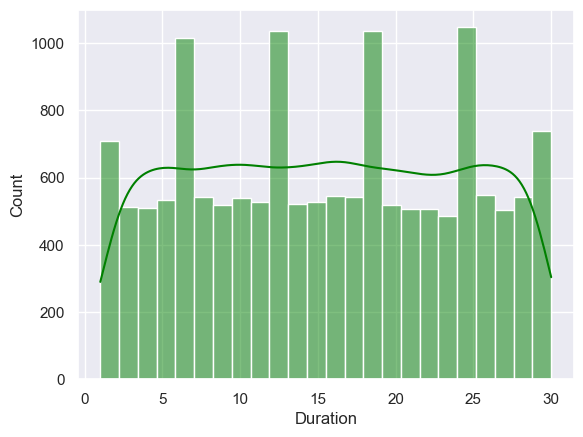

In [19]:
sns.histplot(data.Duration, kde=True, color='green')

<Axes: xlabel='Heart_Rate', ylabel='Count'>

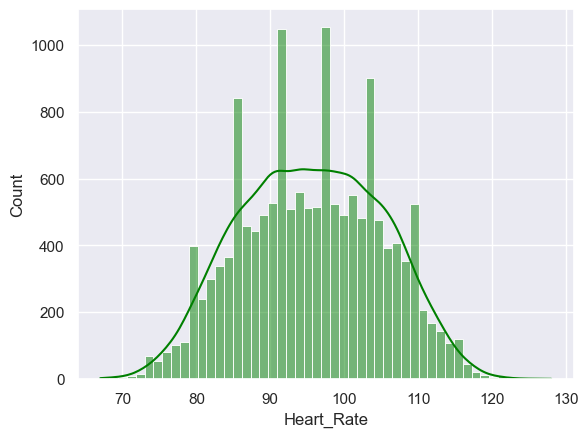

In [20]:
sns.histplot(data.Heart_Rate, kde=True, color='green')

<Axes: xlabel='Body_Temp', ylabel='Count'>

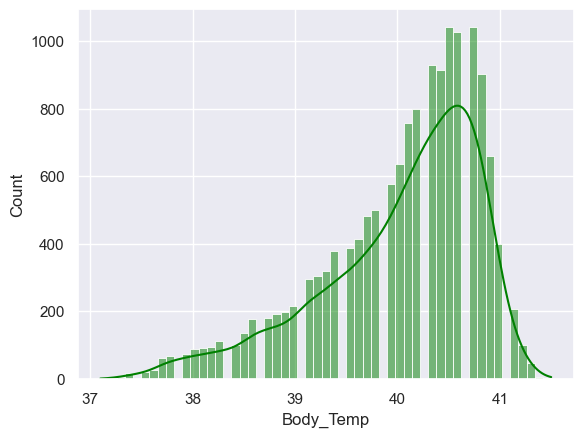

In [21]:
sns.histplot(data.Body_Temp, kde=True, color='green')

<Axes: >

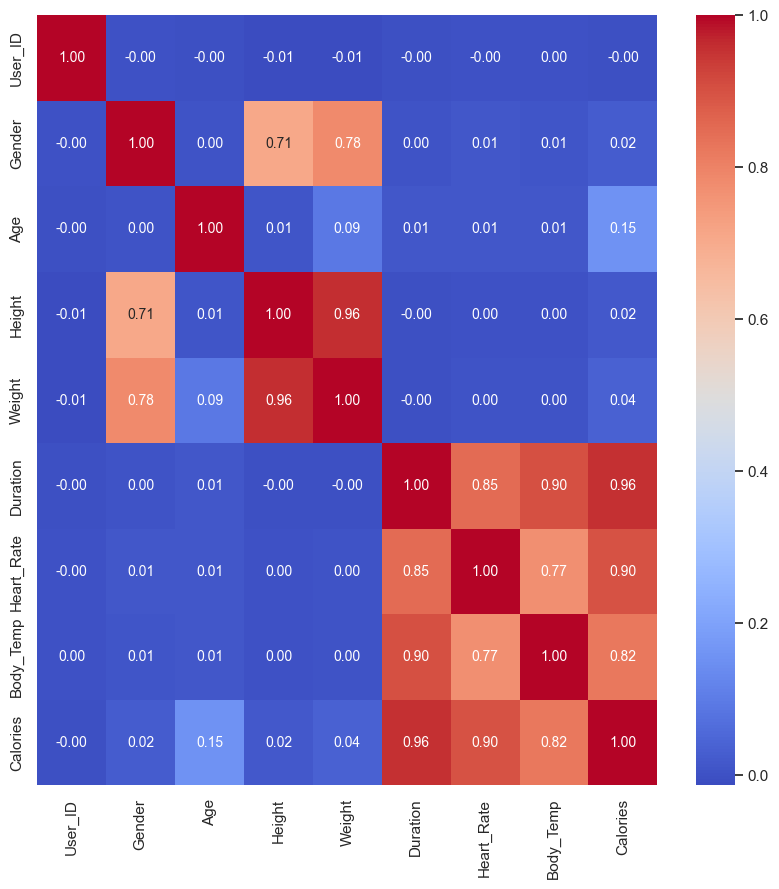

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, yticklabels=True, annot_kws={'size': 10})

In [23]:
X = data.drop(columns=['Calories', 'User_ID'], axis=1)
y = data.Calories

In [24]:
print(X.shape)
print(y.shape)

(15000, 7)
(15000,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(15000, 7) (12000, 7) (3000, 7)
(15000,) (12000,) (3000,)


In [29]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
training_prediction = model.predict(X_train)
r2_train = r2_score(y_train, training_prediction)
print('R2 score of training dataset:', r2_train)

R2 score of training dataset: 0.9995691477017405


In [31]:
testing_prediction = model.predict(X_test)
r2_test = r2_score(y_test, testing_prediction)
print('R2 score of testing dataset:', r2_test)

R2 score of testing dataset: 0.998800624504713


In [34]:
mae = mean_absolute_error(y_test, testing_prediction)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.4833678883314132
